# Linear regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn import linear_model
from IPython.display import HTML
from ipywidgets import interactive
from mpl_toolkits.mplot3d import Axes3D  

## What is machine learning?

- *"Machine learning is a subset of artifical intelligence (AI) that learns to make decisions by fitting mathematical models to observed data"* - Understanding Deep Learning by Simon J. D. Prince
- We will start by understanding linear regression, which is one of the foundations of more complex statistical methods 
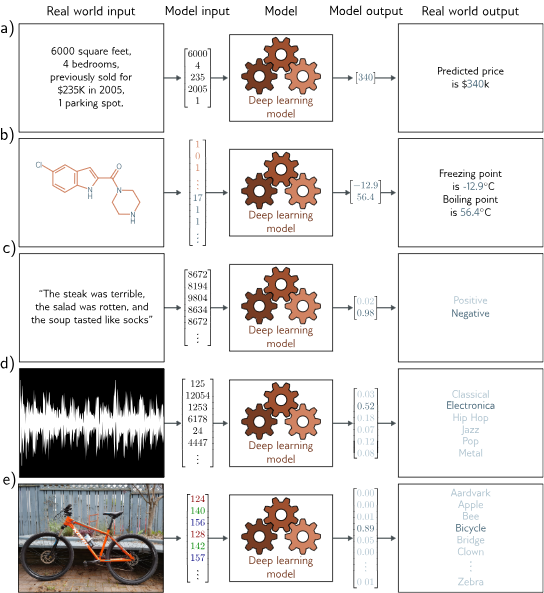

<small>*Image taken from Understanding Deep Learning, Prince 2022. This work is subject to a Creative Commons CC-BY-NC-ND license. (C) MIT Press.*</small>

## Linear regression 

- Regression is an example of supervised learning as we know both the inputs and outputs. Unsupervised learning can be used to find patterns in the data, for example, [k-means clustering](https://uk.mathworks.com/help/stats/kmeans.html)


### We are given the below dataset (link)

The dataset is made up of 498 entries of people being surveyed about their yearly income and how they would score their happiness out of 10. Qualitatively we can see that there is a postive linear relationship, but how could be predict what someone's happiness score would be expected to be if we are given a new datapoint? 

Text(0, 0.5, 'Reported happiness')

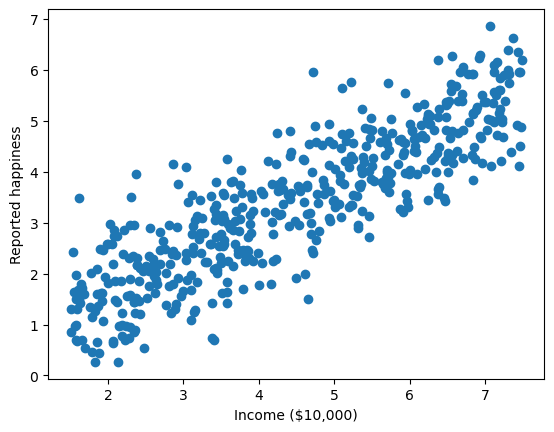

In [3]:
df = pd.read_csv('datasets/income_data.csv')

plt.scatter(df["income"],df["happiness"])
plt.xlabel("Income ($10,000)")
plt.ylabel("Reported happiness")

For visualisation purposes, we will sample 50 data points and only use these for our analysis.

In [ ]:
# we take 50 random samples of our dataset with random_state=0 so our samples are reproducible
samples = df.sample(n=50,random_state=0)

plt.scatter(samples["income"],samples["happiness"])
plt.xlabel("Income ($10,000)")
plt.ylabel("Reported happiness")

### Use the below plot to play around with the parameters and see how low you can get the error

The connect_best_fit() function is given to you which plots lines connecting each data point to the given line of best fit, using this you can write a distance() function which defines the error as the sum of the squared distances of these lines. Make sure your cell passes the test before moving on. 

Because we can see that the line of best fit is linear, we are simply fitting 

$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}
$$

where x is the parameters of the dataset and w is the parameters of the model. So in this case, because we just have one dimension (feature), we can rewrite this equation in a more familiar form.

$$
y = mx + c
$$

In [ ]:
def connect_best_fit(ax, x, y, slope, intercept):
    
    # removing old red lines
    [r.remove() for r in ax.lines if r.get_color() == 'red']
    
    for i in range(len(y)):
        
        # calculate the y coordinate of the line of best fit
        y_opt = slope * x[i] + intercept

        # plot lines connecting y_opt to y
        ax.plot([x[i], x[i]], [y_opt, y[i]], color='red', linewidth=1)
    return    

def distance(x,y,intercept,slope):

  ### BEGIN SOLUTION  
  distances = []

  for i in range(len(y)):
    y_opt = slope * x[i] + intercept
    dist = y_opt - y[i]
    distances.append(dist)

  distance = np.sum(np.square(distances))
  ### END SOLUTION  
  return distance

In [ ]:
assert distance(samples["income"].values,samples["happiness"].values,1,0) - 394.238185340277 < 1e-6

In [ ]:
x_data = samples["income"].values
y_data = samples["happiness"].values

# y values for the line of best fit
def f(x, slope, intercept):
    return intercept + slope * x

def plot_fit(slope=0,intercept=3):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data, label='original data')
    ax.plot(x_data, f(x_data, slope, intercept), 'k-', label='fitted line')
    connect_best_fit(ax, x_data, y_data, slope, intercept)
    error = distance(x_data,y_data,intercept,slope)
    ax.set_title(f"Error: {error:,.2f}")
    plt.legend()
    plt.show()

interactive(plot_fit,slope=(-10,10,0.001),intercept=(-4,20,0.001))

Using [SciPy](https://scipy.org/) we can find the optimal parameters to minimise the least-squares error. But how is this done behind the scenes?

In [ ]:
plt.close()
# %matplotlib inline

res = stats.linregress(samples["income"],samples["happiness"])

fig, ax = plt.subplots()
ax.plot(samples["income"],samples["happiness"], 'o', label='original data')
ax.plot(samples["income"], res.intercept + res.slope*samples["income"], 'k', label='line of best fit')
plt.xlabel("Income ($10,000)")
plt.ylabel("Reported happiness")
plt.legend()

print('slope ', res.slope)
print('intercept ', res.intercept)

# reset indices starting from 0
samples.index = range(len(samples.index))
connect_best_fit(ax,samples["income"],samples["happiness"],res.slope,res.intercept)

print("The least squares error is ", distance(x_data,y_data,res.intercept,res.slope))

plt.show()

### How is the line of best fit actually calculated? 

(Go through maths on the board and only show key equations below)

We want to fit the best model that describes the data, which we can do by minimising the error. In this case it is very clear to visualise as we want to minimise the length of the red lines. This is the reason that it is called least squares (because the points might be above or below the line of best fit. 

Now we can look at how the line of best fit is actually calculated. 

$$
f(m,c) = \sum_{i=1}^{n} [y_i - (mx_i + c)]^2
$$

We see that we arrive at the below equation, which means we can solve for the paramers analytically. 

$$
m = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}
$$


(Number equations to make them easier to reference)

We can take partial derivatives of the distance w.r.t. the slope and intercept and set these to 0. This example has a closed form solution so we can get the answer analytically, but later we will look at how to minimise the error when we can't do that (neural networks). 

We will start with the partial derivative w.r.t. the intercept

$$
\frac{\partial f(m,c)}{\partial c} = \frac{\sum_i[\partial y_i - (mx_i +c)]^2}{x} = 0
$$

Using the chain rule, we can set $u=y_i-(mx_i+c)$

Therefore, $\frac{\partial u}{\partial c} = -1$ and $\frac{\partial f(m,c)}{\partial u} = \frac{\sum_i \partial u^2}{\partial u} = 2 \sum_i u$

So our solution is 

$$
-2 \sum_i [y_i -(mx_i + c)] = 0 = \sum_i [y_i -(mx_i + c)]
$$

Now we can take the partial derivative w.r.t. the slope 

$$
\frac{\partial f(m,c)}{\partial m} = \frac{\sum_i[\partial y_i - (mx_i +c)]^2}{m} = 0
$$

Once again, we use the chain rule and set $u=y_i-(mx_i+c)$

Therefore, $\frac{\partial u}{\partial m} = -x_i$ and $\frac{\partial f(m,c)}{\partial u} = \frac{\sum_i \partial u^2}{\partial u} = 2 \sum_i u$

So our solution is 

$$
-2 x_i \sum_i [y_i -(mx_i + c)] = 0 = x_i \sum_i [y_i -(mx_i + c)]
$$

If we expand out our solution for $\frac{\partial f(m,c)}{\partial c}$ we get

\begin{align*}
\sum_i y_i - m \sum_i x_i - nc = 0 \\ \Rightarrow \sum_i y_i = m \sum_i x_i + nc
\end{align*}

We can write this in terms of c

$$
c = \frac{1}{n} \sum_i y_i - m \frac{1}{n} \sum_i x_i = \bar{y} - m\bar{x}
$$

We can also expand out our solution for $\frac{\partial f(m,c)}{\partial c}$

\begin{align*}
\sum_i x_i y_i = m \sum_i x_i^2 - c \sum_i x_i = 0 \\ \Rightarrow \sum_i x_i y_i = m \sum_i x_i^2 + c \sum_i x_i
\end{align*}

Now if we sub $c = \bar{y} - m\bar{x}$ into this equation we get

$$
\bar{y} - m\bar{x} \sum_i + n \sum_i x_i^2 = \sum_i x_i y_i 
$$

We can use the fact that $\sum_i x_i = n \bar{x}$

\begin{align*}
\Rightarrow \bar{y}n\bar{x} - mn\bar{x}^2 + m \sum_i x_i^2 = \sum_i x_i y_i  \\
\Rightarrow m(\sum_i x_i^2 - n \bar{x}^2) = \sum_i x_i y_i - n \bar{x} \bar{y}
\end{align*}

Writing this in terms of m, 

$$
m = \frac{\sum_i x_i y_i - n \bar{x} \bar{y}}{\sum_i x_i^2 - n \bar{x}^2} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sum_i (x_i - \bar{x})^2}
$$

Can also make link to variance and covariance. 



Implement the equations we have derived in the below cell. 

In [ ]:
# INTERACTIVE - students can write the below equations based on the ones we derived

### BEGIN SOLUTION
x = samples["income"]
y = samples["happiness"]

# compute means
xbar = x.mean()
ybar = y.mean()

m = np.sum((x-xbar) * (y-ybar)) / np.sum((x-xbar)**2)
c = ybar - m*xbar

### END SOLUTION
print("Closed-form solution:")
print("  intercept = ", c)
print("  slope = ", m)

In [ ]:
assert c-0.4768377260544052 < 1e-6
assert m-0.6613012408321589 < 1e-6

Going back to the full dataset, we can see that it is noisy - the datapoints do not line up perfectly with the line of best fit but are distributed around it. By plotting a heatmap of the data we can see that the noise appears to be distributed 'normally'. This is the foundation for [Bayesian linear regression](https://medium.com/intuition/gentle-introduction-of-bayesian-linear-regression-c83da6b0d1f7).

In [ ]:
# we can see in this dataset the noise is gaussian

plt.hist2d(df["income"],df["happiness"], bins=15, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('Heatmap of data')
plt.xlabel("Income ($10,000)")
plt.ylabel("Reported happiness")
plt.show()

## Non-linear data

We started with an example where we could clearly see beforehand that the line of best fit is straight, but this does not mean we can only look at these examples. We can introduce the use of basis functions which if they are non-linear then we can fit non-linear data. 

We can extend our above equation 

$$
y(\mathbf{x}; \mathbf{w}) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}
$$

to the generalised linear model

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$

where $\mathbf{w} = (w_{1}, ... , w_{m})^{T}$ are weights and $\boldsymbol{\phi} = (\phi_{1}, ..., \phi_{m})^{T}$ are arbitrary basis functions. 


Linear basis functions: $\phi(x) = [1,x]$

Once we have solved for the weights (intercept and slope):

We can introduce the idea of the design matrix $\Phi$ which stores information about the basis functions being evaluated for each x. 

So for our linear basis functions, we get

$$
\Phi = \begin{bmatrix}
\phi_1(x_1) & \phi_2(x_1)\\
\phi_1(x_2) & \phi_2(x_2)\\
\vdots & \vdots\\
\phi_1(x_n) & \phi_2(x_n)
\end{bmatrix}
$$

$$
\Rightarrow \begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_n
\end{bmatrix}
$$

Now $\mathbf{y = \Phi w}$

$$
\begin{bmatrix}
y_1\\
y_2\\
y_3 \\
\vdots \\
y_N
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_n
\end{bmatrix}
\begin{bmatrix}
c \\ m
\end{bmatrix}
= c + m \mathbf{x}
$$


Now our closed-form solution is (also go through derivation)

$$
\mathbf{w_{LS} = (\phi^{T}\phi)^{-1}\phi^{T}y}
$$

However, matrix inversion is numerically unstable. 

### Is this still linear regression? 

The model is still linear w.r.t. weights even though we can use non-linear basis functions. The basis functions allow us to transform the data so that we can define the model as a linear combination of the transformed features and weights. 

$$
f(w; x) = w_1 \phi_1(x) + w_2 \phi_2(x) + w_3 \phi_3(x) + ... + w_n + \phi_n(x)
$$

for fixed x. 

For the equation to be linear we require: 

    1. Homegenity (scaling)
    
$$
    f(aw; x) = aw_1 \phi_1(x) + aw_2 \phi_2(x) + aw_3 \phi_2(x) + ... + aw_n + \phi_n(x)
    = a(w_1 \phi_1(x) + w_2 \phi_2(x) + w_3 \phi_3(x) + ... + w_n + \phi_n(x))
    = af(w)
 $$

    2. Additivity
    
$$
f(\alpha u+\beta v ;x) = (\alpha u_1+\beta v_1) \phi_1(x) + (\alpha u_2+\beta v_2) \phi_2(x) + (\alpha u_3+\beta v_3) \phi_3(x) + ... + (\alpha u_n+\beta v_n) \phi_n(x)
= \alpha \sum_{i=1}^n u_i \phi_i(x) + \beta \sum_{i=1}^n v_i \phi_i(x)
= \alpha f(u ;x) + \beta f(v ;x)
$$

We can plot now plot a noisy sin curve to look at a more complex example. 

In [ ]:
def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)

def g(X, noise_variance):
    """
    Sinus function plus noise
    """
    return 0.5 + np.sin(2*np.pi*X) + noise(X.shape, noise_variance)

# generate some sample data
X_g = np.random.uniform(0, 2, size=100)[:, None]
Y_g = g(X_g, noise_variance=0.2**2)
X, Y = X_g, Y_g # save for later

# plotting code
plt.plot(X, Y, 'x', label='Observations')
plt.xlabel("Time / s")
plt.ylabel("Signal strength / arb.")
plt.show()

### Non-linear basis functions

Now clearly when we look at this data, we cannot fit it using a straight line anymore. However, we can still fit the data using linear regression. We need to introduce basis functions and in this case we will choose radial basis functions. 

+ Radial basis functions, $\phi_j(\mathbf{x}) = \exp\left[-\frac{\parallel \mathbf{x} - \mathbf{x}_j\parallel^2}{2\ell^2}\right]$.

Essentially these are just Gaussians centred at different points, which we can see in the plot below. 

In [ ]:
def rbf(xc, l, x):

    ### BEGIN SOLUTION
    return np.exp(-0.5 * (x - xc)**2 / l**2)
    ### END SOLUTION

def design_matrix(x, num_basis, l, xc):
    num_observations = x.shape[0]
    Phi = np.zeros((num_observations, num_basis))
    for i in range(num_observations):
        Phi[i, :] = rbf(xc, l, x[i])
    return Phi


In [ ]:
assert np.sum(rbf(np.linspace(0, 10, 100),0.5,np.linspace(0, 10, 100)[:, None])) - 1191.943004374688 < 1e-6

In [ ]:
l = 0.2
num_basis = 10

# where the rbfs are centred
xc = np.linspace(0, 2, num_basis)

# points where we make predictions
x = np.linspace(0, 2, 100)[:, None]

# to get the design matrix, we evaluate the basis functions at each x
Phi_p = design_matrix(x,num_basis,l,xc)
plt.plot(x, Phi_p)
plt.ylabel(r'$\phi_j(x)$')
plt.xlabel('x')

In the cell below, use [np.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) to calculate and plot the predicted values for y. 

In [ ]:
### BEGIN SOLUTION
Phi = design_matrix(X,num_basis,l,xc)
w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
Y_p = Phi_p @ w_LS
### END SOLUTION

plt.plot(X, Y, 'x', label=' Observations')
plt.plot(x, Y_p, lw=2, label='Prediction')
plt.legend(loc='best')


In [ ]:
assert Y_p[0]-0.66907465 < 1e-6

In [ ]:
# plot contributions of each basis function

for i in range(num_basis):
   plt.plot(x, Phi_p[:, i] * w_LS[ i] ,'-')

This plot shows us how each basis function contributes to the overall prediction. We can see in the figure below that the final prediction is taken as a sum of all the basis functions at all of the points along the x axis. 

In [ ]:
def cum_basis_funcs(number):
    fig, ax = plt.subplots()
    ax.scatter(X, Y, label='data')
    ax.set_xlim(0, 2)
    ax.set_ylim(Y.min() - 0.5, Y.max() + 0.5)
    
    basis_lines = [ax.plot([], [], lw=1.5, alpha=0.6)[0] for i in range(num_basis)]
    total_line = ax.plot([], [], 'r-', lw=2.5, label='cumulative sum')
    ax.legend()
    
    for j in range(num_basis):
        if j == 0: 
            ax.plot([], [])
        elif j <= number:
              ax.plot(x, Phi_p[:, j-1] * w_LS[j-1])
        else:
              ax.plot([],[])
    
    # cumulative sum
    y_sum = Phi_p[:, :number] @ w_LS[:number]
    ax.plot(x,y_sum, 'red', lw=4)
    ax.set_title(f"Adding basis function {number}/{num_basis}")
    return basis_lines + [total_line]
    
    plt.show()

interactive(cum_basis_funcs,number=(0,10,1))

### Difficulty of choosing hyperparameters

In [ ]:
def change_hyper(num_basis,l):
    
    fig, ax = plt.subplots()
    ax.plot(X, Y, 'x', label=' Observations')
    
    xc = np.linspace(0, 2, num_basis)
    Phi_p = design_matrix(x,num_basis,l,xc)
    Phi = design_matrix(X,num_basis,l,xc)
    w_LS = np.linalg.lstsq(Phi, Y, rcond=None)[0]
    y = Phi_p @ w_LS
    
    ax.set_ylim(-1,2.1)
    ax.plot(x,y)
    
    
    
interactive(change_hyper,num_basis=(1,30,1),l=(0.1,100,0.01))    

Make link that we have to choose number of basis functions and length ourself (maybe make students play around with these parameters themselves to see what happens). Also, link back to first example and how we can't be certain of our prediction (especially when given limited data) - Bayesian regression. 

Then as an extension to this where we don't even need to pick basis functions ourselves, you can look at Gaussian Procress regression. 

## 2D example 

The example we just looked at was clearly too simple because income is not the only factor which determines happiness. Let's now look a 2D example (link).

In [ ]:
df = pd.read_csv('datasets/multiple_income.csv')

print(df)

We can use [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) for this multivariate example. The cell below shows you how to get the optimised parameters, your task is to plot the plane of best fit. 

In [ ]:
%matplotlib widget

X = df[["age","experience"]]
y = df["income"]

regr = linear_model.LinearRegression()
regr.fit(X, y)

# print(regr.score(X,y))
print(regr.coef_)
print(regr.intercept_)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(df["age"],df["experience"],df["income"], label="Datapoints")

### BEGIN SOLUTION
x_surf, y_surf = np.meshgrid(np.linspace(min(df["age"]), max(df["age"]), 20), np.linspace(min(df["experience"]), max(df["experience"]), 20))
income_pred = regr.intercept_ + regr.coef_[0]*x_surf + regr.coef_[1]*y_surf
ages = np.linspace(np.min(df["age"]),np.max(df["age"]),20)
experiences = np.linspace(np.min(df["experience"]),np.max(df["experience"]),20)
ax.plot_surface(x_surf,y_surf,income_pred,alpha=0.5)
### END SOLUTION

ax.legend()

However, we can see clearly that there are sparse regions where we still predict a linear relationship between inputs and the output. As we saw with the first example, this isn't necessarily the case, so we should have a way of saying we are less confident about predictions where we don't have as much data close by (esentially what Bayesian regression is). 